In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Given $f(x,y)=\bigg[\begin{matrix} y-x^3-2x^2+1 \\ y +x^2-1\end{matrix}\bigg]$, find its root $\vec x^*$ with $f(\vec x^*)=\vec 0$

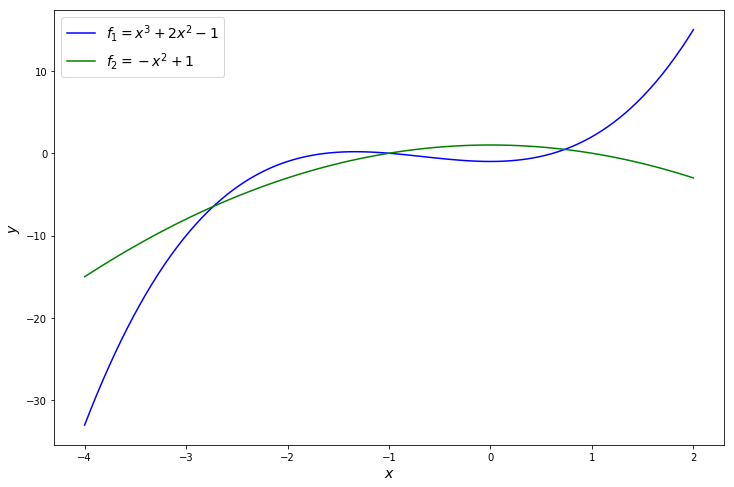

In [2]:
x = np.linspace(-4, 2, 100)
y1 = x**3 + 2 * x**2 - 1
y2 = -x**2 + 1

plt.figure(figsize=(12, 8))
plt.plot(x, y1, c='b', label="$f_1=x^3 + 2x^2 - 1$")
plt.plot(x, y2, c='g', label="$f_2=-x^2 + 1$")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Newton Method

### From Scratch

In [3]:
def newton_method(f, x0, fprime, tol=1e-10, num_epochs=1000):
    x = []
    x.append(x0)
    fprime_inv = np.linalg.inv(fprime(x0)) # assume jacobian matrix is squared and inversible
    for k in range(num_epochs):
        x.append(x[k] - fprime_inv.dot(f(x[k])))
        fprime_inv = np.linalg.inv(fprime(x[k]))
        
        if sum(abs(f(x[k+1]))) < tol:
            print("the number of iteration: ", k+1)
            break
    
    return x, x[-1]

In [4]:
import sympy
sympy.init_printing()

x, y = sympy.symbols("x, y")
f1 = y - x**3 - 2 * x**2 + 1
f2 = y + x**2 - 1
f = sympy.Matrix([f1, f2])
f

⎡   3      2        ⎤
⎢- x  - 2⋅x  + y + 1⎥
⎢                   ⎥
⎢     2             ⎥
⎣    x  + y - 1     ⎦

In [5]:
f.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [6]:
def f(X):
    return np.array([X[1] - X[0]**3 - 2 * X[0]**2 + 1, X[1] + X[0]**2 - 1])

In [7]:
def f_jacobian(X):
    return np.array([[-3 * X[0]**2 - 4 * X[0], 1], [2 * X[0], 1]])

In [8]:
roots1, root1 = newton_method(f, [-3, -7], f_jacobian)
root1

the number of iteration:  6


array([-2.73205081, -6.46410162])

In [9]:
roots2, root2 = newton_method(f, [-1.5, -2], f_jacobian)
root2

the number of iteration:  6


array([-1.00000000e+00,  5.30422638e-17])

In [10]:
roots3, root3 = newton_method(f, [1, 1], f_jacobian)
root3

the number of iteration:  6


array([0.73205081, 0.46410162])

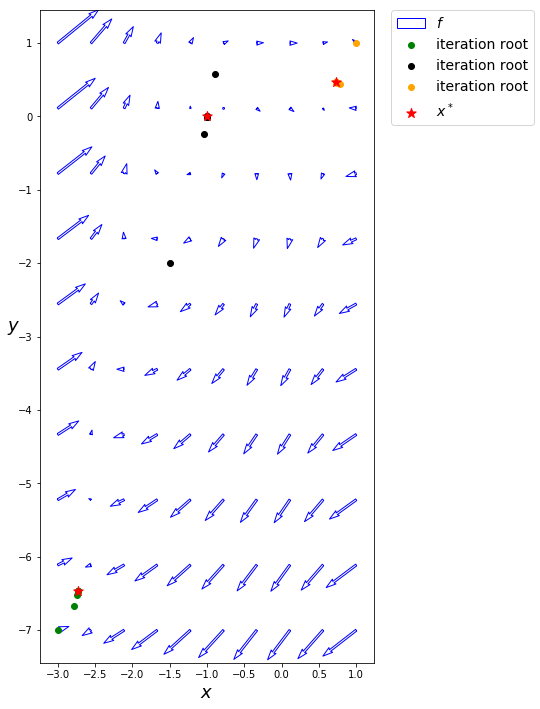

In [11]:
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-3, 1, 10)
Y = np.linspace(-7, 1, 10)
X, Y = np.meshgrid(X, Y)
X1 = Y - X**3 - 2 * X**2 + 1
X2 = Y + X**2 - 1

fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(111)
ax.quiver(X, Y, X1, X2, edgecolor='b', facecolor='None', linewidth=1, label="$f$")
for i, r in enumerate(roots1[0:-1]):
    ax.scatter(r[0], r[1], color='g')
    if i == len(roots1[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='g', label="iteration root")

for i, r in enumerate(roots2[0:-1]):
    ax.scatter(r[0], r[1], color='black')
    if i == len(roots2[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='black', label="iteration root")

for i, r in enumerate(roots3[0:-1]):
    ax.scatter(r[0], r[1], color='orange')
    if i == len(roots3[0:-1]) -1 :
        ax.scatter(r[0], r[1], color='orange', label="iteration root")
        
ax.scatter(root1[0], root1[1], marker='*', color='red', s=100, label="$x^*$")
ax.scatter(root2[0], root2[1], marker='*', color='red', s=100)
ax.scatter(root3[0], root3[1], marker='*', color='red', s=100)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend(loc=2, fontsize=14, bbox_to_anchor=(1.05,1.0),borderaxespad=0.)  
plt.show()

### Using `Scipy`

In [12]:
from scipy import optimize

optimize.fsolve(f, [-3, -10], fprime=f_jacobian)

array([-2.73205081, -6.46410162])

In [13]:
optimize.fsolve(f, [-1.5, -2], fprime=f_jacobian)

array([-1.0000000e+00,  4.0059414e-13])

In [14]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])